In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings("ignore")

### DataFrame représentant les ventes de produits(légumes) de 2020 à 2023 d'un supermarché appelé PythonMarket

### Le but c'est d'analyser et tirer des conclusions pertinantes pour préparer la nouvelle année 2024 qui arrive à grand pas.

In [2]:
data1 = pd.read_csv('data_vente/annex2.csv', sep=',')
data2 = pd.read_csv('data_vente/annex1.csv', sep=',')

### EXPLORATION DES DONNEES

In [3]:
data1.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No


In [4]:
data2.head()

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables


On remarque que les deux datasets ont en commun la colonne 'Item Code' qui a les mêmes valeurs dans les deux datasets.

Nous allons donc les fusionner pour travailler sur un seul dataset

In [5]:
merged_data_sell = pd.merge(data1, data2)
merged_data_sell.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Code,Category Name
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum
1,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum
2,2020-07-01,09:21:55.556,102900005117056,0.277,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum
3,2020-07-01,09:22:01.274,102900005117056,0.132,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum
4,2020-07-01,09:41:09.342,102900005117056,0.198,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum


## Maintenant on va travailler sur le dataset merged_data_sell.

### Exploration de merged_data_sell

Nombre de lignes et de colonnes:

In [6]:
def count_rows_and_columns(data = merged_data_sell):
    rows = data.shape[0]
    columns = data.shape[1]
    
    print('Rows: ', rows,  '\n', 'Columns: ', columns )
    
    return 

count_rows_and_columns()

Rows:  878503 
 Columns:  10


Vérification des valeurs manquantes:

In [7]:
merged_data_sell.isnull().sum()

Date                           0
Time                           0
Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
Item Name                      0
Category Code                  0
Category Name                  0
dtype: int64

## Vérification des types de données

In [8]:
merged_data_sell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878503 entries, 0 to 878502
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         878503 non-null  object 
 1   Time                         878503 non-null  object 
 2   Item Code                    878503 non-null  int64  
 3   Quantity Sold (kilo)         878503 non-null  float64
 4   Unit Selling Price (RMB/kg)  878503 non-null  float64
 5   Sale or Return               878503 non-null  object 
 6   Discount (Yes/No)            878503 non-null  object 
 7   Item Name                    878503 non-null  object 
 8   Category Code                878503 non-null  int64  
 9   Category Name                878503 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 73.7+ MB


## Convertion de la colonne data en type date

In [9]:
merged_data_sell['Date'] = pd.to_datetime(merged_data_sell['Date'])

# CALCUL ET EXPLORATION STATISQUE

### Etude de la corrélation entre les variables:

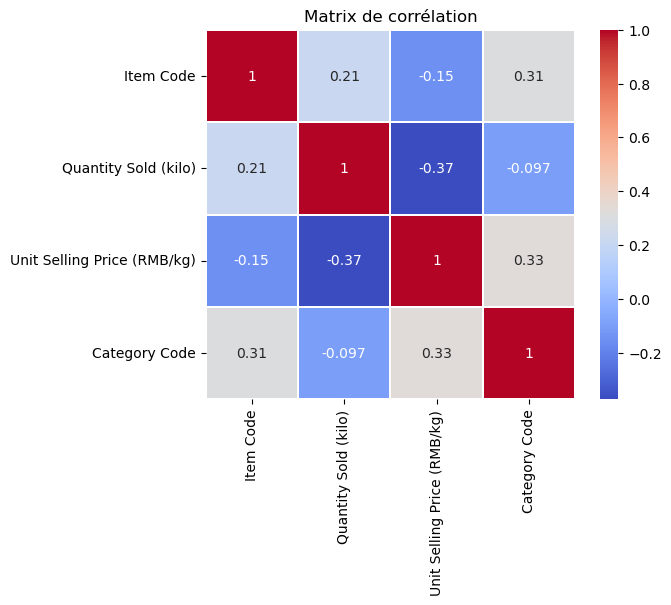

In [10]:
sns.heatmap(merged_data_sell.corr(), annot=True, square=True, cmap='coolwarm', linewidths=.10)
plt.title('Matrix de corrélation')
plt.show()

#### On remarque des coorrélations positives entre #Quantité et #Code du produit, aussi entre la #catégory et le produit. La catégorie du produit et le code des produits sont aussi corrélés positivement. Les autres variables sont corrélées négativement

### Description des stats:


In [11]:
merged_data_sell.describe()

,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Category Code
count,8.785030e+05,878503.000000,878503.000000,8.785030e+05
mean,1.030313e+14,0.536112,8.917144,1.011010e+09
std,7.174368e+11,0.400087,6.311265,2.582929e+02
min,1.029000e+14,-9.082000,0.100000,1.011010e+09
25%,1.029000e+14,0.290000,4.900000,1.011010e+09
50%,1.029000e+14,0.435000,7.900000,1.011010e+09
75%,1.029000e+14,0.742000,10.800000,1.011011e+09
max,1.069740e+14,160.000000,119.900000,1.011011e+09


## Analyse de données et visualisation

In [12]:
## Je définis les couleurs qe je vais utiliser sur mes visualisations.

my_colors = {
    'rouge': '#FF0000',     # Rouge
    'bleu': '#0000FF',      # Bleu
    'vert': '#00FF00',      # Vert
    'jaune': '#FFFF00',     # Jaune
    'orange': '#FFA500',    # Orange
    'violet': '#800080',    # Violet
    'rose': '#FFC0CB',      # Rose
    'gris': '#808080',      # Gris
    'cyan': '#00FFFF',      # Cyan
    'magenta': '#FF00FF',   # Magenta
}
color = my_colors.values()

In [13]:
count_product_category = merged_data_sell['Category Name'].value_counts()
count_product_category

Flower/Leaf Vegetables         331968
Capsicum                       207996
Edible Mushroom                148424
Cabbage                         86570
Aquatic Tuberous Vegetables     58647
Solanum                         44898
Name: Category Name, dtype: int64

### On peut le voir visuellement, c'est plus simple

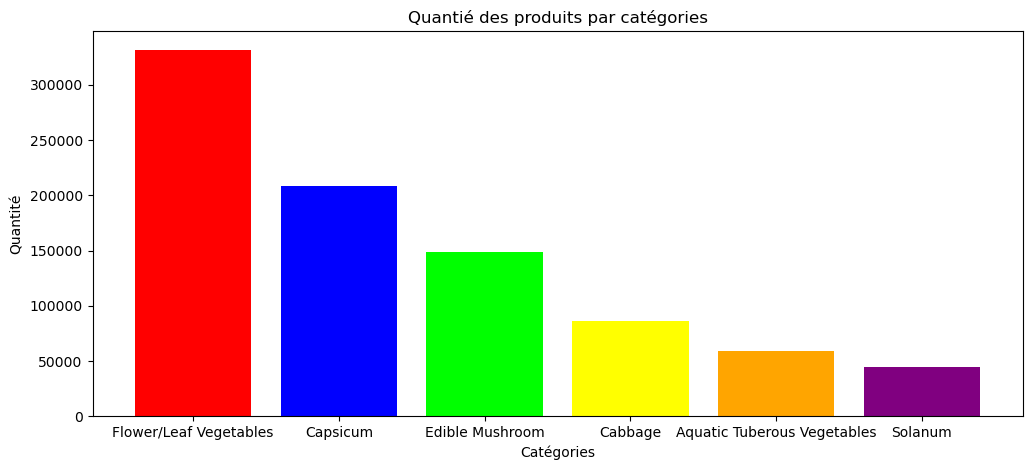

In [14]:
figure = plt.figure(figsize=(12,5))

graphe= figure.add_subplot()

x_values = count_product_category.index
y_values = count_product_category.values


graphe.bar(x_values, y_values, color = color)
#graphe.plot(x_values, y_values, color='red')
plt.title('Quantié des produits par catégories')
plt.xlabel('Catégories')
plt.ylabel('Quantité')
plt.show()

### Essayons de voir les 20 produits les plus vendus

In [15]:
# Récupérons uniquement les produits vendus 
data_product_sales = merged_data_sell[merged_data_sell['Sale or Return'] == 'sale']
data_product_sales.head()


,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Code,Category Name
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum
1,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum
2,2020-07-01,09:21:55.556,102900005117056,0.277,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum
3,2020-07-01,09:22:01.274,102900005117056,0.132,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum
4,2020-07-01,09:41:09.342,102900005117056,0.198,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum


In [16]:
## Regroupons les produits vendus par leur nom et calculons la quantité totale

total_quantity_by_product = data_product_sales.groupby('Item Name')['Quantity Sold (kilo)'].sum()

total_quantity_by_product

Item Name
7 Colour Pepper (1)         263.192
7 Colour Pepper (2)         370.209
7 Colour Pepper (Bag)        18.000
Agaricus Bisporus (Bag)      10.000
Agaricus Bisporus (Box)    4233.000
                             ...   
Zhijiang Red Bolt          4962.956
Zhijiang Red Bolt (Bag)     313.000
Zhimaxiancai                  9.381
Zhuyecai                   7246.958
Zhuyecai (Bag)             1077.000
Name: Quantity Sold (kilo), Length: 242, dtype: float64

#### Trions ces données par ordre croissant des quantités


In [17]:
total_quantity_by_product = total_quantity_by_product.sort_values(ascending = False)
total_quantity_by_product

Item Name
Wuhu Green Pepper (1)    28181.741
Broccoli                 27556.616
Net Lotus Root (1)       27166.459
Chinese Cabbage          20905.257
Yunnan Shengcai          15915.422
                           ...    
Ganlanye                     0.943
Red Coral (Leaf)             0.682
Purple Cabbage (2)           0.615
Red Oak Leaf                 0.419
Fruit Pepper (Orange)        0.415
Name: Quantity Sold (kilo), Length: 242, dtype: float64

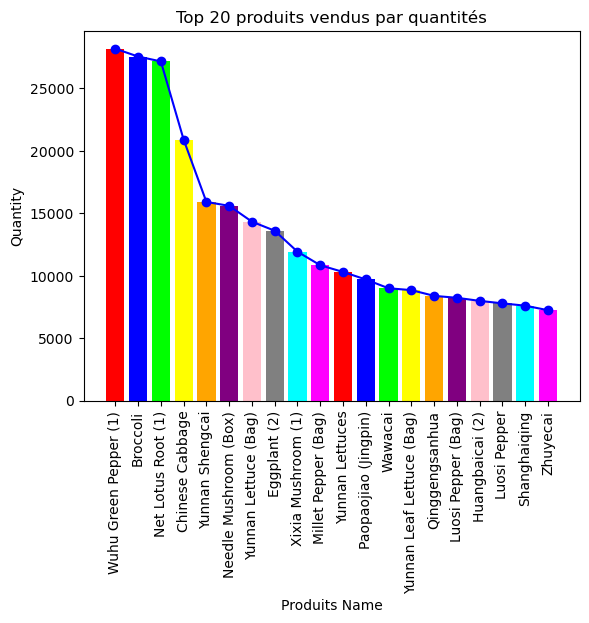

In [18]:
## Récupérons les 20 Meilleurs produits vendus:
top_20_products = total_quantity_by_product.head(20)

plt.bar(top_20_products.index, top_20_products.values, color = color)
plt.plot(top_20_products.index, top_20_products.values, color = 'blue', marker='o')

plt.title('Top 20 produits vendus par quantités')
plt.xlabel('Produits Name')
plt.ylabel('Quantity')

plt.xticks(rotation=90)
plt.show()

#### Regardons le chiffre d'affaires 
#### On sait que le Chiffre d'affaire = quantité * prix unitaire

In [19]:
data_product_sales['sales(€)'] = data_product_sales['Quantity Sold (kilo)'] * data_product_sales['Unit Selling Price (RMB/kg)']

In [20]:
def total_sold(df = data_product_sales):
    return df['sales(€)'].sum()

print('L\'entreprise a eu un total de vente de : ', total_sold(),'€ en 4 ans')

L'entreprise a eu un total de vente de :  3372023.3423 € en 4 ans


## ET Si on analysait les top 20 produits qui nous ont rapportés plus d'argent ? 

In [21]:
## On fait un groupby 
top_sold_product = data_product_sales.groupby('Item Name')['sales(€)'].sum().reset_index()


## Trions ce resultat par ordre croissant des ventes en €
top_sold_product = top_sold_product.sort_values(by = 'sales(€)', ascending = False)
top_sold_product.head()

,Item Name,sales(€)
24,Broccoli,270067.2656
136,Net Lotus Root (1),211769.9397
223,Xixia Mushroom (1),211356.7198
209,Wuhu Green Pepper (1),205219.9385
233,Yunnan Shengcai,129797.0675


#### Maintenant récupérons les 20 meilleurs produits et visualisons les.

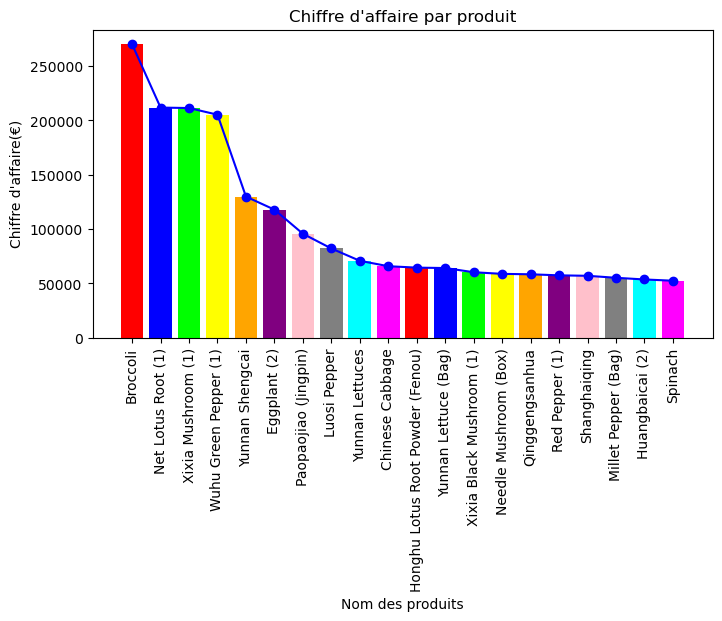

In [22]:
top_20_sales = top_sold_product.head(20)
top_20_sales

x_value = top_20_sales['Item Name']
y_value = top_20_sales['sales(€)']

plt.figure(figsize=(8, 4))
plt.bar(x_value, y_value, color = color)
plt.plot(x_value, y_value, color = 'blue', marker = 'o')
plt.title('Chiffre d\'affaire par produit')
plt.xlabel('Nom des produits')
plt.ylabel('Chiffre d\'affaire(€)')

plt.xticks(rotation=90)

plt.show()

##### Les Broccoli nous rapportent plus d'argent  que les autres produits, on devait beaucoup miser sur ça et n'en jamais en manquer dans nos stocks.

On remarque aussi que les produits sont vendus par-rapport à la quantité qu'il y a avait en stock. Si on analyse le graphique précédents, les produits qui avaient plus de quantité nous rapporte plus d'argent.

CCL: Plus de quantité de produit augmente notre CA

# EVOLUTION DES VENTES PAR ANNEE

In [23]:
#Création de la colonne année
data_product_sales['year'] = data_product_sales['Date'].dt.year


#### Regroupement du chiffre d'affaire par année

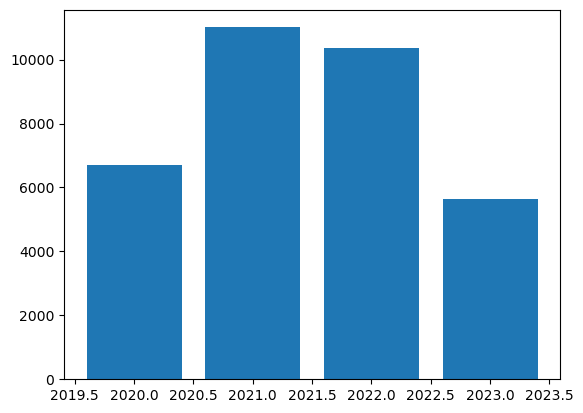

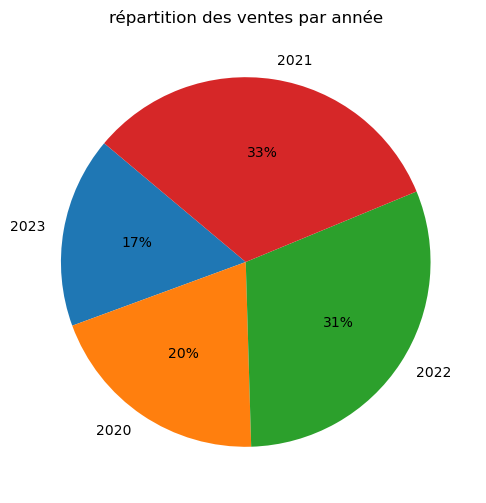

In [24]:
sales_by_year = data_product_sales.groupby('year')['sales(€)'].sum()
sales_by_year = sales_by_year.sort_values(ascending = True)


plt.bar(sales_by_year.index, sales_by_year.values/100)
#plt.plot(sales_by_year.index, sales_by_year.values)
plt.figure(figsize=(6,6))
plt.pie(sales_by_year, labels = sales_by_year.index,  startangle=140, autopct='%1.f%%')
plt.title('répartition des ventes par année')

plt.show()

CCL: Sans compter l'année en cours(2023), on voit que l'année 2020 a eu moins de ventes que les autres, on aurait tendance à évoquer la pandémie mondiale comme source de causalité entre les ventes de cette année 2020 et le CA. 
En revanche l'année 2021  avec un peu plus de 32% de part de chiffre d'affaire sur les 4ans

## Evolution de ventes par mois depuis 2021

In [25]:
## Création d'une colonne mois
data_product_sales['Months'] = data_product_sales['Date'].dt.month
data_product_sales

sales_by_months = data_product_sales.groupby(['Months'])['Quantity Sold (kilo)'].sum()

#Création d'un Df
df_sales_by_months = pd.DataFrame({'Mois' : sales_by_months.index,
                                  'Total quantité (Kg)': sales_by_months.values})

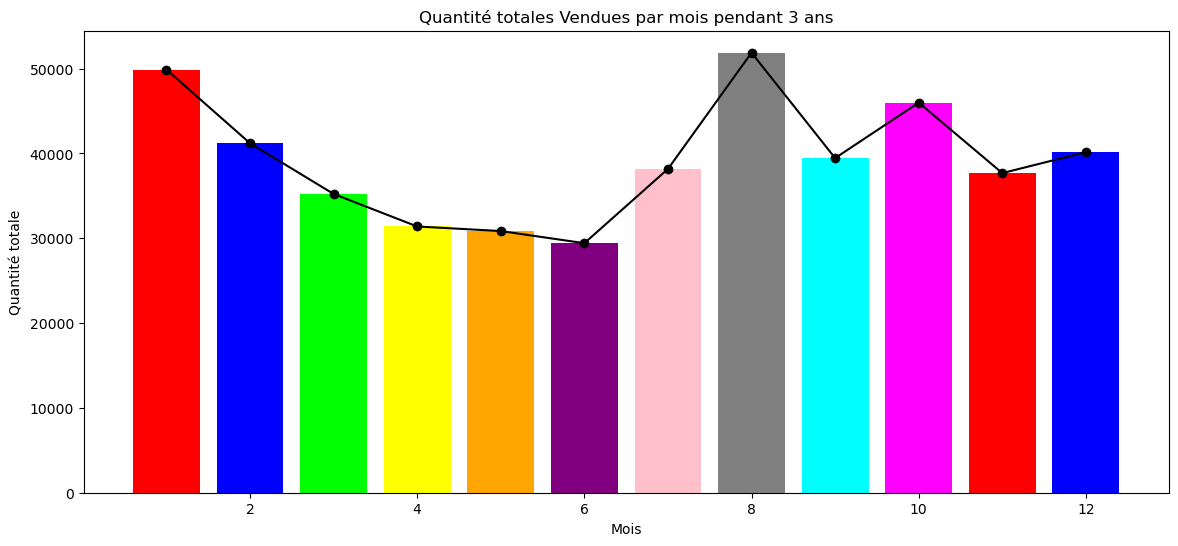

In [26]:
## Visualisation
plt.figure(figsize=(14, 6))
plt.bar(df_sales_by_months['Mois'], df_sales_by_months['Total quantité (Kg)'], color = color)
plt.plot(df_sales_by_months['Mois'], df_sales_by_months['Total quantité (Kg)'], color = 'black', marker = 'o')


plt.title('Quantité totales Vendues par mois pendant 3 ans')
plt.xlabel('Mois')
plt.ylabel('Quantité totale')

plt.show()

## Dans notre dataset, il y a des produits qui ont été retournés, on peut les analyser 

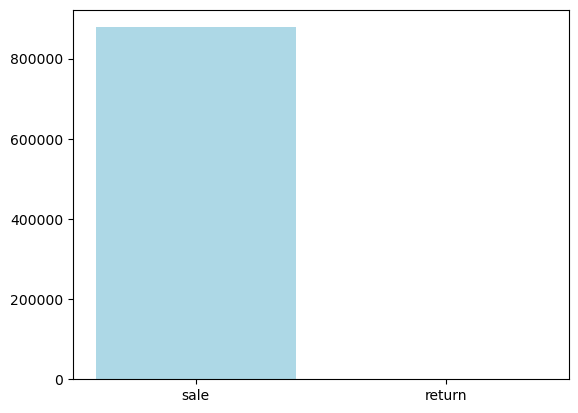

In [27]:
sales_or_return = merged_data_sell['Sale or Return'].value_counts()
df_sales_or_return = pd.DataFrame(sales_or_return)

plt.bar(sales_or_return.index, sales_or_return.values, color = 'lightblue')
plt.show()

#### Sur les 3 ans, on a pratiquement pas de retour de produit, on a eu plus de vente que de retour ce qui est une bonne chose pour 'entreprise, on doit continuer dans cette voix là

In [28]:
df_sales_or_return

,Sale or Return
sale,878042
return,461


# ESSAYONS DE PREDIRE LE PRIX VENTES de 2023

### On va traviller que avec les données de 2023, comme l'année n'est pas encore terminée, ça sera bien de prédire les prix 

#### On récupère les données des produits VENDUS de 2023

In [29]:
data_2023 = merged_data_sell[merged_data_sell['Date'].dt.year == 2023]

data_sold_2023 = data_2023[data_2023['Sale or Return'] == 'sale']
data_sold_2023.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Code,Category Name
39948,2023-01-25,19:02:28.032,102900005115960,0.852,1.8,sale,No,Chinese Cabbage,1011010101,Flower/Leaf Vegetables
39949,2023-01-25,19:57:14.47,102900005115960,1.250,1.8,sale,No,Chinese Cabbage,1011010101,Flower/Leaf Vegetables
39950,2023-01-25,21:11:36.245,102900005115960,1.364,1.8,sale,No,Chinese Cabbage,1011010101,Flower/Leaf Vegetables
39951,2023-01-25,21:31:38.282,102900005115960,0.341,1.8,sale,No,Chinese Cabbage,1011010101,Flower/Leaf Vegetables
39952,2023-01-26,16:39:26.547,102900005115960,0.455,1.8,sale,No,Chinese Cabbage,1011010101,Flower/Leaf Vegetables


## On va faire une prédiction sur les prix de vente 

In [30]:
sell = merged_data_sell[merged_data_sell['Sale or Return'] == 'sale']

sell_2023 = sell[sell['Date'].dt.year == 2023]
sell_2023.reset_index()

,index,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Code,Category Name
0,39948,2023-01-25,19:02:28.032,102900005115960,0.852,1.8,sale,No,Chinese Cabbage,1011010101,Flower/Leaf Vegetables
1,39949,2023-01-25,19:57:14.47,102900005115960,1.250,1.8,sale,No,Chinese Cabbage,1011010101,Flower/Leaf Vegetables
2,39950,2023-01-25,21:11:36.245,102900005115960,1.364,1.8,sale,No,Chinese Cabbage,1011010101,Flower/Leaf Vegetables
3,39951,2023-01-25,21:31:38.282,102900005115960,0.341,1.8,sale,No,Chinese Cabbage,1011010101,Flower/Leaf Vegetables
4,39952,2023-01-26,16:39:26.547,102900005115960,0.455,1.8,sale,No,Chinese Cabbage,1011010101,Flower/Leaf Vegetables
...,...,...,...,...,...,...,...,...,...,...,...
129868,878498,2023-06-21,16:30:43.092,102900011036686,1.000,3.9,sale,No,Muercai (Bag),1011010101,Flower/Leaf Vegetables
129869,878499,2023-06-23,18:47:46.777,102900011036686,1.000,3.9,sale,No,Muercai (Bag),1011010101,Flower/Leaf Vegetables
129870,878500,2023-06-27,20:48:10.998,102900011036686,1.000,3.9,sale,Yes,Muercai (Bag),1011010101,Flower/Leaf Vegetables
129871,878501,2023-06-29,19:14:35.799,102900011036686,1.000,2.3,sale,Yes,Muercai (Bag),1011010101,Flower/Leaf Vegetables


### Définition de la fonction de prédiction par-raport à la quantité 

In [31]:
"""def predict_price(quantity:float):
    copy_df = merged_data_sell.copy()
    #On va trouver le prix par rapport à la distance des quantités,
    #je vais ajouter une colonne distance eucludienne au df broccoli_sold_in_2023
    
    copy_df['Distance_eucludienne'] = copy_df['Quantity Sold (kilo)'].apply(lambda quantity_needed: np.abs(quantity_needed - quantity))

    # Il faut trier cette colonne car nous voulons les meilleurs distances(ou petites), donc les voisins les plus proches
    copy_df = copy_df.sort_values(by = 'Distance_eucludienne')
    
    # et on récupère les 5 plus proches voisins en fonction de la disctance sur la colonne prix puisque c'est ça que nous voulons prédire
    five_nearest_neighbors = copy_df['Unit Selling Price (RMB/kg)'].head(5)
    
    return five_nearest_neighbors.mean() #On retourn la moyenne pour avoir le prix voulu/quantité

#print(predict_price(0.536112))"""

"def predict_price(quantity:float):\n    copy_df = merged_data_sell.copy()\n    #On va trouver le prix par rapport à la distance des quantités,\n    #je vais ajouter une colonne distance eucludienne au df broccoli_sold_in_2023\n    \n    copy_df['Distance_eucludienne'] = copy_df['Quantity Sold (kilo)'].apply(lambda quantity_needed: np.abs(quantity_needed - quantity))\n\n    # Il faut trier cette colonne car nous voulons les meilleurs distances(ou petites), donc les voisins les plus proches\n    copy_df = copy_df.sort_values(by = 'Distance_eucludienne')\n    \n    # et on récupère les 5 plus proches voisins en fonction de la disctance sur la colonne prix puisque c'est ça que nous voulons prédire\n    five_nearest_neighbors = copy_df['Unit Selling Price (RMB/kg)'].head(5)\n    \n    return five_nearest_neighbors.mean() #On retourn la moyenne pour avoir le prix voulu/quantité\n\n#print(predict_price(0.536112))"

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

sell_2023['mois'] = sell_2023['Date'].dt.month


# Sélection des caractéristiques et de la cible (Ce que nous voulons prédire)
features = ['mois', 'Quantity Sold (kilo)', 'Category Code']

target = 'Unit Selling Price (RMB/kg)'

X = sell_2023[features]

y = sell_2023[target]

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et ajustement du modèle KNN Regressor


knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Prédiction sur le set de test
predictions = knn.predict(X_test)

# Evaluation du modèle en calculant les métriques comme 

R2 = r2_score(y_test, predictions)
l.append(R2)


print("R² = ", round(R2*100),'% --> Le modèle est bon')

R² =  71 % --> Le modèle est bon


In [33]:
predicted_prices_data = sell_2023[:len(predictions)]

predicted_prices_data['predicted_prices'] = predictions

predicted_prices_data = predicted_prices_data[['mois', 'Category Code' , 'Quantity Sold (kilo)', 'predicted_prices', 'Unit Selling Price (RMB/kg)']]

predicted_prices_data

,mois,Category Code,Quantity Sold (kilo),predicted_prices,Unit Selling Price (RMB/kg)
39948,1,1011010101,0.852,11.96,1.8
39949,1,1011010101,1.250,4.26,1.8
39950,1,1011010101,1.364,4.00,1.8
39951,1,1011010101,0.341,13.52,1.8
39952,1,1011010101,0.455,4.94,1.8
...,...,...,...,...,...
412160,1,1011010501,0.430,4.54,14.0
412161,1,1011010501,0.516,5.50,14.0
412162,1,1011010501,0.301,24.00,14.0
412163,1,1011010501,0.810,5.20,14.0
